In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import *
from statsmodels.graphics.tsaplots import *
from catboost import *
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.datasets import load_diabetes
from sklearn.model_selection import *
from sklearn.linear_model import *
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import *
from sklearn.ensemble import *
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.svm import *
from sklearn.neighbors import *
from sklearn.neural_network import *
from sklearn.metrics import *
import pickle
import shap

plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决无法显示符号的问题
palette = 'deep'
sns.set(font='SimHei', font_scale=1.2, style='whitegrid', palette=palette)  # 解决Seaborn中文显示问题



D:\Users\win\AppData\Roaming\Python\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def getxy():
    targetKey = '货量'
    # 对场地进行编码

    df = pd.read_excel('../原始数据/附件1：物流网络历史货量数据.xlsx')
    df['场地1'] = df['场地1'].str.replace('DC', '')
    df['场地1'] = df['场地1'].astype('int64')
    df['场地2'] = df['场地2'].str.replace('DC', '')
    df['场地2'] = df['场地2'].astype('int64')

    df['日期'] = pd.to_datetime(df['日期'])
    df['日期'] = df['日期'] - df['日期'].min()
    df['日期'] = df['日期'].apply(lambda x: x.days)
    return df.drop(targetKey, axis=1), df[targetKey]

-----------[XGBRegressor]XGBoost回归-----------


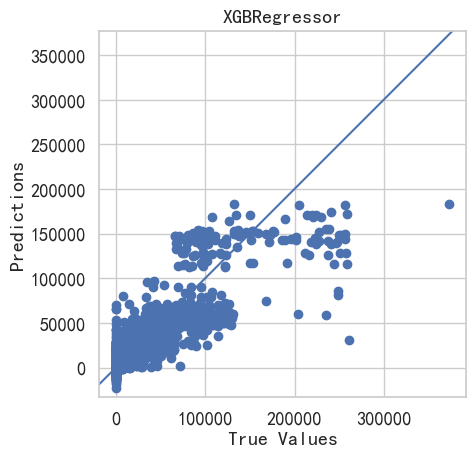

[XGBRegressor]XGBoost回归 r2_score: 0.7869223296286705
[XGBRegressor]XGBoost回归 mse: 46905418.10430494
[XGBRegressor]XGBoost回归 mae: 2523.330947327138
[XGBRegressor]XGBoost回归 mape: 76.77520663004564


In [4]:

X, Y = getxy()

# 获取特征名称
feature_names = X.columns.tolist()

# 将数据集划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)  # , random_state=42

alpha_ = 12.8
# 定义回归模型列表
models = [
    # LinearRegression(),
    # Ridge(alpha=alpha_),
    # Lasso(),
    # ElasticNet(),
    # DecisionTreeRegressor(),
    # RandomForestRegressor(),
    # AdaBoostRegressor(),
    # GradientBoostingRegressor(),
    XGBRegressor(),
    # LGBMRegressor(),
    # CatBoostRegressor(),
    # SVR(),
    # KNeighborsRegressor(),
    # MLPRegressor()
]

modelDict = {
    'LinearRegression': '线性回归',
    'Ridge': '岭回归',
    'Lasso': '套索回归',
    'ElasticNet': '弹性网络回归',
    'DecisionTreeRegressor': '决策树回归',
    'RandomForestRegressor': '随机森林回归',
    'AdaBoostRegressor': 'AdaBoost回归',
    'GradientBoostingRegressor': '梯度提升回归',
    'XGBRegressor': 'XGBoost回归',
    'LGBMRegressor': 'lightgbm回归',
    'CatBoostRegressor': 'CatBoost回归',
    'SVR': '支持向量机回归',
    'KNeighborsRegressor': 'K近邻回归',
    'MLPRegressor': '多层感知器回归'
}

# 对每个模型进行训练和测试，并输出R-squared值
for model in models:
    modelName = type(model).__name__
    title = f'[{modelName}]{modelDict[modelName]}'
    print(f'-----------{title}-----------')
    # if type(models).__name__ == 'LGBMRegressor':
    #     model.fit(X_train, y_train, feature_name=feature_names)
    # else:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # r2 = r2_score(y_test, y_pred)

    # 预测并可视化结果
    plt.scatter(y_test, y_pred)
    plt.title(type(model).__name__)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    # plt.xlim([9e4, 1e5])
    # plt.ylim([9e4, 1e5])
    _ = plt.plot([-1e10, 1e10], [-1e10, 1e10])
    plt.tight_layout()
    # plt.savefig(f'{modelName}.svg')
    plt.show()

    # 计算均方误差
    print(title, f'r2_score: {r2_score(y_test, y_pred)}')
    print(title, f'mse: {mean_squared_error(y_test, y_pred)}')
    print(title, f'mae: {mean_absolute_error(y_test, y_pred)}')
    print(title, f'mape: {mean_absolute_percentage_error(y_test, y_pred)}')

    # # 保存模型
    # with open(f'{modelName}.pkl', 'wb') as f:
    #     pickle.dump(model, f)

    # if type(model).__name__ == 'CatBoostRegressor':
    #     print('超参数', model.get_all_params())
    #
    #     '''
    #     敏感性分析
    #     '''
    #     explainer = shap.Explainer(model)
    #     shap_values = explainer(X)
    #
    #     plt.figure(figsize=(8, 6))
    #     shap.plots.waterfall(shap_values[0], show=False)
    #     plt.tight_layout()
    #     # plt.savefig('sensitivity-waterfall.svg')
    #     plt.show()
    #
    #     plt.figure(figsize=(8, 6))
    #     shap.plots.bar(shap_values, show=False)
    #     plt.tight_layout()
    #     # plt.savefig('sensitivity-bar.svg')
    #     plt.show()
    #
    #     plt.figure(figsize=(8, 6))
    #     shap.summary_plot(shap_values, X, show=False)
    #     plt.tight_layout()
    #     # plt.savefig('sensitivity-beeswarm.svg')
    #     plt.show()

    # if type(model).__name__ == 'Ridge':
    #     for feature, coef in zip(feature_names, model.coef_):
    #         print(f"{feature}: {coef:.5f}")
    #     print('系数', model.coef_ / alpha_)
